# Assignment 2
Some general remarks for handing in exercises:
- Each exercise comes with context and code from the exercise-set of which it is a part. It is up to you to recycle the right code. Run all the code (make sure the output is present and correct as far as you can tell) and then save and submit.  Submitting code without running it runs the risk of not getting credit.
- Make sure to answer each sub-exercise
- Commenting amply on your results makes it easier to understand that you were on the right track, even if the answer was incorrect (or partially correct)

### Week 4

> **Ex. 4.3.1**: Investigate how well your model generalizes. You may have noticed that the performance seemed a little too good to be true in Ex 4.2.1.
1. Why did you get such a high accuracy in the previous exercise?
2. Split your data into a test and training set of equal size. Train the model only on the training set and report its accuracy and F1 score (for minority class) on both the training and test sets.
3. Comment on the difference you observe.
>
> *Hint: Watch out for unbalanced class proportions! You may want to randomly reorder the rows of your datapoints and target labels so your training and test sets have the same amount of heroes and villains.*

[ANSWER TO EX. 4.3.1] We got a high accuracy for the previous exercise because we are overfitting the model. That means the machine is learning too well that it's no longer generalizing.

In [4]:
# ANSWER TO EX. 4.3.1
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

# Read in the CSV file
data = pandas.read_csv('../data/team-alliance.csv', index_col = 0)

# Disregard the ambiguous characters
X_ta = data[data['faction']!=2]

#Randomize array
X_ta = X_ta.sample(frac = 1)

# Split the data into target array and the team alliance matrix
withoutTarget = X_ta.iloc[:,:-1]
target = X_ta.iloc[:,-1:].values.ravel()

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(withoutTarget, target, test_size=0.5)

# Train and analyze the model
model = BernoulliNB()
model.fit(X_train, y_train)  # <--- This is the training step\
y_pred = model.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred), 'f1:', f1_score(y_test, y_pred))


accuracy: 0.792332268370607 f1: 0.7470817120622567


[ANSWER TO EX. 4.3.1] The accuracy decreases. This makes sense because our model is no longer overfitting so our accuracy is not as good, but our model is better at generalizing and classifying, since we still have a relatively higher accuracy.

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data (still only heroes and villains).
* Get a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments. It produces an array with two columns, where the 1st column is the probability of class 1 (which is heroes).
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

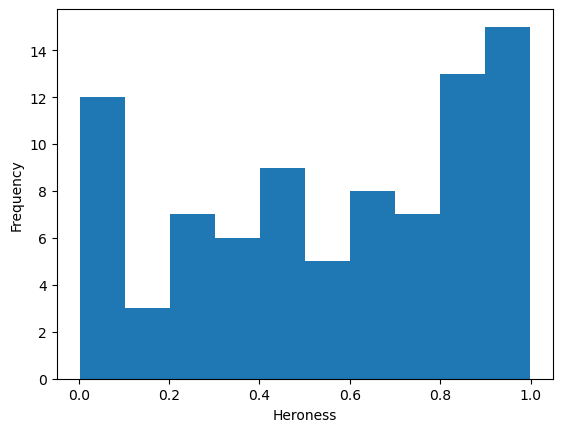

In [7]:
# ANSWER TO EX. 4.4.1
import matplotlib.pyplot as plt

# Retrain model
model = BernoulliNB()
model.fit(X_train, y_train)

# Get the team alliance matrix and target array for the ambiguous characters
ambig_ta = data[data['faction']==2]
ambig_set = ambig_ta.iloc[:,:-1]

# Prediction for villains
villainness = model.predict_proba(ambig_set)

# Visualize the distribution
plt.hist(villainness[:, 0]) # the first column is heroness (prob of class 1)
plt.xlabel('Heroness')
plt.ylabel('Frequency')
plt.show()

[ANSWER TO EX. 4.4.1] The distribution plot indicates that most ambiguous characters are either heroes or villains. However, there are a substantial amount of ambiguous characters that are in the middle who can't be classified as either heroes or villains.

### Week 5
You should have a dataframe called `data_teams` with characters as rows and alliances as columns (+ one column for faction)

>**Ex. 5.1.2**: Split your data (`data_teams`) into two subsets. One where characters are affiliated with X-men and one where they are not.
1. What is the entropy of target labels in each subset?
2. What is the weighted average entropy of the split?
3. Write a function that computes the weighted average entropy of a split, given the data and team (name or id) on which to split the data. Show that it gives you the same split entropy that you obtained in point 2.
4. Plot the distribution of split entropy for all features. Comment on the result. My figure looks [like this](https://dhsvendsen.github.io/images/BD_5_1_2_4.png).

In [24]:
# ANSWER TO EX. 5.1.2
import pandas
import numpy as np

# Read in the CSV file
data_teams = pandas.read_csv('../data/team-alliance.csv')

#Entropy function for the dataset file
def entropy(dataset):
    values, counts = np.unique(dataset['faction'][dataset.index], return_counts=True)
    #Converts to probability
    probs = counts / len(dataset)
    #Entropy
    return -np.sum(probs * np.log2(probs))

Xmen = data_teams[data_teams['X-Men']==1]
entropy(Xmen)

print(f"Xmen: {entropy(Xmen)}")
noXmen = data_teams[data_teams['X-Men']!=1]
entropy(noXmen)


print(f"No Xmen: {entropy(noXmen)}")

Xmen: 1.2189514568588302
No Xmen: 1.3927646434063696


In [25]:
#2. Weighted average entropy of the split
print(f"Weighted Average: {((entropy(noXmen)*noXmen.shape[0]) + (entropy(Xmen)*Xmen.shape[0]))/data_teams.shape[0]}")

Weighted Average: 1.3849308096464805


In [26]:
#General func for average split
def getAvgSplit(data, team):
    splitOne = data[data[team] == 1]
    entropy(splitOne)

    splitTwo = data[data[team] != 1]
    entropy(splitTwo)

    return ((entropy(splitOne)*splitOne.shape[0]) + (entropy(splitTwo)*splitTwo.shape[0]))/data.shape[0]

print(f"Get average: {getAvgSplit(data_teams,'X-Men')}")

Get average: 1.3849308096464805


Text(0, 0.5, 'Amount of Teams')

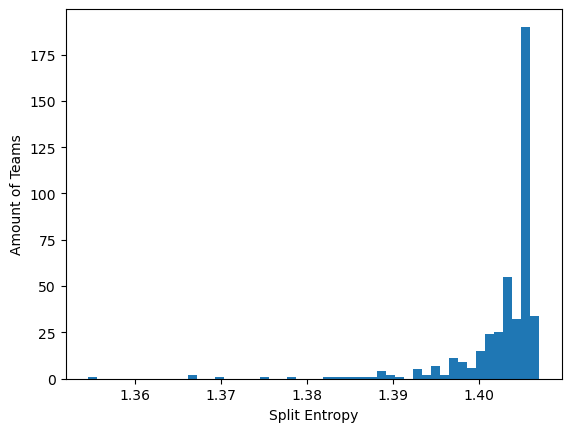

In [27]:
import matplotlib.pyplot as plt
allEntropies = []

#Looping through all the teams to graph the entropy for all the splity
for team in data_teams[data_teams.columns[1:-1]]:
    allEntropies.append(getAvgSplit(data_teams,team))

plt.hist(allEntropies, bins=50)
plt.xlabel("Split Entropy")
plt.ylabel("Amount of Teams")

>**Ex. 5.2.2**: *Fit* a logistic regression! You can use the `scipy` module `scipy.optimize.curve_fit`
to fit a model to some data (i.e. find the best parameter values `w`). 
> Fit the `logistic_regression` to the data `x` (input) and `y` (target).
> Again, plot and color the points according to their prediction. My figure looks like [this](https://dhsvendsen.github.io/images/BD_5_2_2_b.png). Comment on the figure and on the shape of the decision boundary.

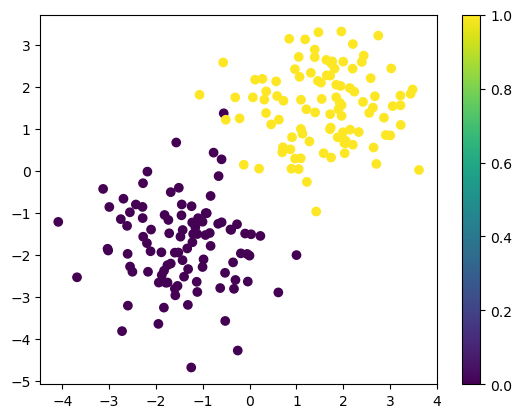

In [28]:
from scipy.optimize import curve_fit
import numpy as np

def generate_X_linear(N=200):
    """A little function that creates some data."""
    x = np.vstack([
        np.random.normal([-1.5, -1.5], 1, size=(int(N/2), 2)),
        np.random.normal([1.5, 1.5], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2))
    
    return x, y

# Generate input and output data
x, y = generate_X_linear()

import matplotlib.pyplot as plt

# Plot and color by actual class-label
plt.scatter(x[:,0], x[:,1], c=y)
plt.colorbar();

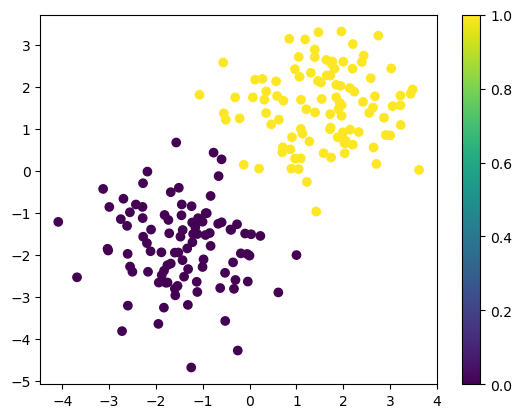

In [29]:
#Logistic regression equations
def logistic_regression(x, w0, w1, w2):
    return 1 / (1+ np.exp(-(x[:,0]*w0 + x[:,1]*w1 + w2)))

#Fitting the curve and getting optimal values of sum of sqrd residuals and the cov of that sum
curve_fit(logistic_regression, x, y)
popt, pcov = curve_fit(logistic_regression, x, y)

# Predict values using logistic function
y_pred = logistic_regression(x, *popt)

cmap = plt.get_cmap()

# Color points based on predicted values using color map
colors = cmap(y_pred)

# Plot results
plt.scatter(x[:,0], x[:,1], c=colors)
plt.colorbar();
plt.show()

### Week 6

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.

[ANSWER TO EX. 6.2.3] The BA network (the scale-free model) recognizes the role of growth and preferential attachment in real networks. It's created as follows: We start with m0 nodes, the links between which are chosen arbitrarily, as long as each node has at least one link. At each timestep we add a new node with m (≤ m0) links that connect the new node to m nodes already in the network. The probability $\Pi$(k) that a link of the new node connects to node i depends on the degree $k_i$. Preferential attachment is probabilistic and new nodes prefer higher-degree nodes to connect to.

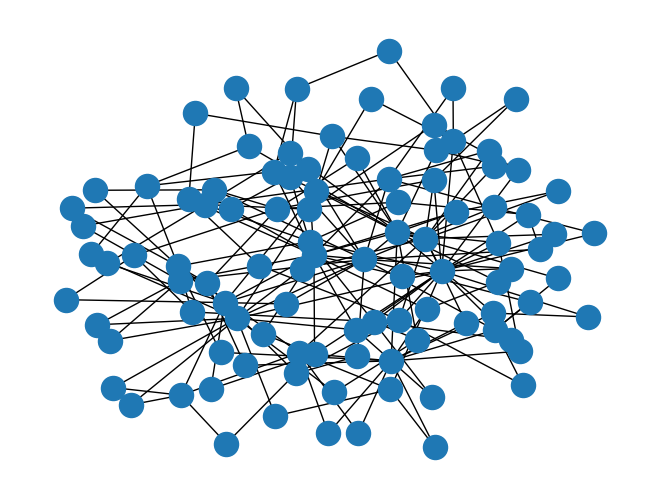

In [14]:
# ANSWER TO EX. 6.1.3
import networkx as nx
import matplotlib.pyplot as plt

# Create the BA network
BA = nx.barabasi_albert_graph(100, 2)
# Plot the network
nx.draw(BA)

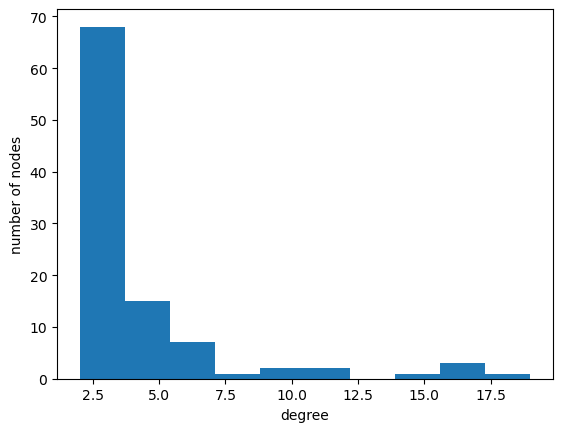

In [15]:
# ANSWER TO EX. 6.1.3
import numpy as np

# Visualize the degree distribution
degree_sequence = sorted((d for n, d in BA.degree()), reverse=True)
plt.hist(degree_sequence)
plt.ylabel('number of nodes')
plt.xlabel('degree')
plt.show()

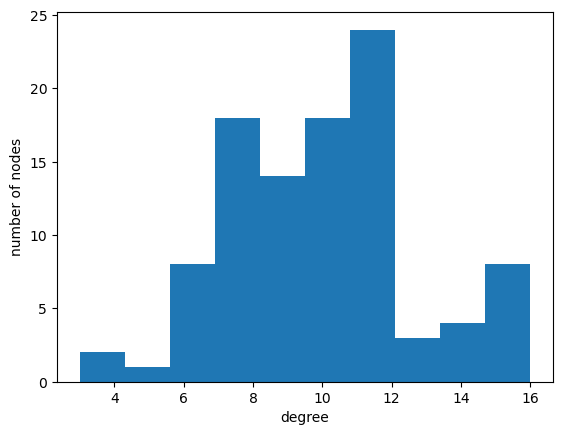

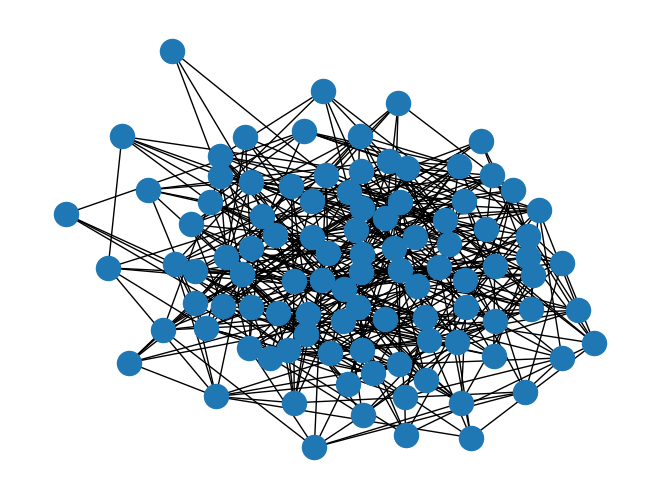

In [16]:
# ANSWER TO EX. 6.1.3

# Visualize the ER network and its degree distribution
ER = nx.erdos_renyi_graph(100, 0.1)
degree_sequence = sorted((d for n, d in ER.degree()), reverse=True)
plt.hist(degree_sequence)
plt.ylabel('number of nodes')
plt.xlabel('degree')
plt.show()
nx.draw(ER)

[ANSWER TO EX. 6.2.3] One key difference between the BA graph and the ER graph are the shape of their distributions of degree! Observe how the BA graph has a hugely skewed distribution, favoring fewer nodes with a high degree while the ER graph is far closer to normal. This is a reflection of the definitions of the graphs. Similarities are that, despite a different number of edges, the number of connected components in each of the above examples is the same, one.

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.
**Do not** add characters that have no partners. And **do not** add links to partners of characters that are not in
your dataset.
>
> *Hint 1: You don't have to explicitly add nodes. Adding an edge will automatically add the corresponding nodes*<br>
> *Hint 2: As you know, many of the characters have a parenthesis in their name that is not important (like "Loki
(comics)"). If you remove this parenthesis your plots in the following will look much nicer. E.g. the regex code
`re.sub(" \(.+?\)", "", char)` will do the job of cleaning up a name like "Loki (comics)" for you. But then there's characters like "Captain America (William Burnside)"
where you might want to keep the parenthesis. It's not a hard requirement that you handle this in an elegant way,
just a suggestion for improving your analysis. In any event, ARGUE for what you do, even if that's doing nothing.*

In [11]:
import re, os

def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("../data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?(?=\|.+=|\}\})", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

get_partners("Iron Man (Ultimate Marvel character)")

['Ultimate Captain America', 'Ultimate Thor', 'War Machine']

In [12]:
# ANSWER TO EX. 6.2.2
import pandas as pd
import networkx as nx

# Read in the dataframe from the team-alliance csv
df = pd.read_csv("../data/team-alliance.csv")

# Get the list of characters in the dataframe
characters = df.iloc[:, 0] # Take the first column of the dataframe
characters = list(characters) # Convert to list

# Initialize the graph network
G = nx.Graph()

# Create nodes and edges in the graph
for c in characters:
    # Clean up the character's name by removing the content in the parenthesis
    new_c = re.sub(" \(.+?\)", "", c)
    
    # Get the list of partner for every character in the dataframe
    partners = get_partners(c)
    for p in partners:
        # Add an edge from the character, c, to his/her partner 
        # but the partner must also be in the dataframe.
        if p in characters:
            # Clean up the partner's name by removing the content in the parenthesis
            new_p = re.sub(" \(.+?\)", "", p)
            # Add the edge and nodes with the cleaned up name
            G.add_edge(new_c, new_p)
            

# Get the list of nodes and edges in the graph
nodes = list(G.nodes)
edges = list(G.edges)

# Print number of nodes
print("Number of nodes %s," % len(nodes))
# Print number of edges
print("Number of edges %s," % len(edges))

# Compute the average degree of the graph
degrees = dict(G.degree())
avg_degree = sum(degrees.values()) / len(degrees)

# Print the average degree
print("The average degree of the graph is:", avg_degree)

Number of nodes 108,
Number of edges 78,
The average degree of the graph is: 1.4444444444444444


[ANSWER TO EX. 6.2.2] For each character's name, we removed the content inside of the parenthesis. We thought this is the best approach because for many character's name, the content inside the parenthesis only states that this is a comic character, which is irrelevant to building our character network. Even in the case, where the inside of the parenthesis is the character's actual name (eg. "Captain America (William Burnside)"), the character is still Captain America.

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network (synthetic network) does it resemble?

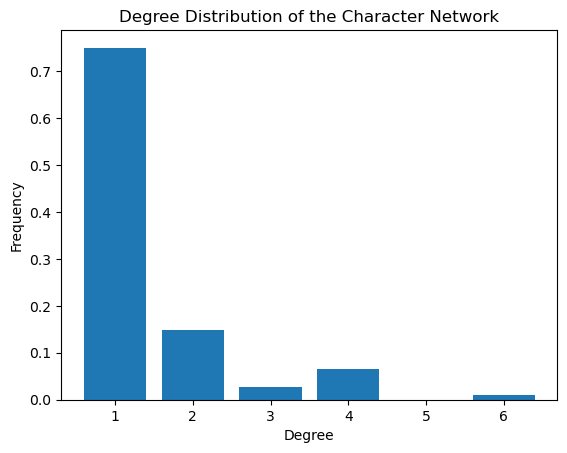

In [13]:
# ANSWER TO EX. 6.2.3
import matplotlib.pyplot as plt

# Compute the degree distribution
degree_values = sorted(set(degrees.values()))
degree_histogram = [list(degrees.values()).count(i) / float(nx.number_of_nodes(G)) for i in degree_values]

# Plot the degree distribution
plt.bar(degree_values, degree_histogram)
plt.title('Degree Distribution of the Character Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

[ANSWER TO EX. 6.2.3] This resembles a BA network based on the degree distribution plot.